In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import requests
import json


In [182]:
exp_file = "ExpRev.csv"
exp_df = pd.read_csv(exp_file)
exp_df.head()

,Year,State,Revenue,Expenditure
0,2007,Alabama,7724467.0,7838377.0
1,2007,Alaska,2188537.0,2274819.0
2,2007,Arizona,9187024.0,9581201.0
3,2007,Arkansas,4589865.0,4681566.0
4,2007,California,72091820.0,73719265.0


In [183]:
#2017 Data

exp17_df= exp_df[exp_df["Year"]==2017]

exp17_df.sort_values('Expenditure', ascending=True)


,Year,State,Revenue,Expenditure
551,2017,South Dakota,1568440.0,1558530.0
518,2017,District of Columbia,1520849.0,1562841.0
555,2017,Vermont,1804614.0,1758510.0
544,2017,North Dakota,1773481.0,1846156.0
536,2017,Montana,1814065.0,1886164.0
560,2017,Wyoming,1930057.0,1911464.0
517,2017,Delaware,2206856.0,2071076.0
522,2017,Idaho,2396039.0,2260290.0
549,2017,Rhode Island,2442045.0,2475343.0
511,2017,Alaska,2504464.0,2587060.0


In [184]:
#Ascending Expenditure Values

In [185]:
grad_file = "../Graduation Rates 2010-2016.csv"
grad_df = pd.read_csv(grad_file)
grad_df.head()

,State,2010,2011,2012,2013,2014,2015
0,United States1,79,80,81,82.3,83.2,84.1
1,Alabama,72,75,80,86.3,89.3,87.1
2,Alaska,68,70,72,71.1,75.6,76.1
3,Arizona,78,76,75,75.7,77.4,79.5
4,Arkansas,81,84,85,86.9,84.9,87.0


In [186]:
new_df = pd.melt(grad_df, id_vars = ['State'], value_name = 'Graduation Rate')
new_df[new_df['State'] == 'Alabama']

,State,variable,Graduation Rate
1,Alabama,2010,72
66,Alabama,2011,75
131,Alabama,2012,80
196,Alabama,2013,86.3
261,Alabama,2014,89.3
326,Alabama,2015,87.1


In [187]:
new_df= new_df.rename(columns={"variable":"Year"})

In [188]:
new_df['Year'] = new_df['Year'].astype(float)

In [189]:
merged_df = pd.merge(exp_df, new_df, on=['State', 'Year'], how="inner")
merged_df.dropna(how='any')

,Year,State,Revenue,Expenditure,Graduation Rate
0,2010,Alabama,7279751.0,7638908.0,72
1,2010,Alaska,2230140.0,2371251.0,68
2,2010,Arizona,8733504.0,8812967.0,78
3,2010,Arkansas,5049424.0,5481913.0,81
4,2010,California,64981631.0,68149357.0,76
...,...,...,...,...,...
283,2015,Virginia,15580882.0,15860940.0,86.7
284,2015,Washington,13609674.0,13586886.0,79.7
285,2015,West Virginia,3465194.0,3464205.0,89.8
286,2015,Wisconsin,11281068.0,11191475.0,88.2


In [190]:
merged_df['Graduation Rate'] = merged_df['Graduation Rate'].astype(float)
merged_df['Expenditure'] = merged_df['Expenditure'].astype(float)

In [191]:
twothousandten = merged_df[merged_df['Year'] == 2010]
twothousandten

,Year,State,Revenue,Expenditure,Graduation Rate
0,2010,Alabama,7279751.0,7638908.0,72.0
1,2010,Alaska,2230140.0,2371251.0,68.0
2,2010,Arizona,8733504.0,8812967.0,78.0
3,2010,Arkansas,5049424.0,5481913.0,81.0
4,2010,California,64981631.0,68149357.0,76.0
5,2010,Colorado,8741450.0,8861592.0,74.0
6,2010,Connecticut,9544243.0,9313668.0,83.0
7,2010,Delaware,1695556.0,1695244.0,78.0
8,2010,District of Columbia,1195934.0,1290048.0,59.0
9,2010,Florida,26223878.0,27267009.0,71.0


In [192]:
twothousandeleven = merged_df[merged_df['Year'] == 2011]
twothousandeleven

,Year,State,Revenue,Expenditure,Graduation Rate
48,2011,Alabama,7375156.0,7402584.0,75.0
49,2011,Alaska,2357828.0,2443898.0,70.0
50,2011,Arizona,8335541.0,8610417.0,76.0
51,2011,Arkansas,5156817.0,5630925.0,84.0
52,2011,California,68589875.0,66849953.0,79.0
53,2011,Colorado,8699604.0,8628304.0,75.0
54,2011,Connecticut,9588416.0,9199399.0,85.0
55,2011,Delaware,1711831.0,1755975.0,80.0
56,2011,District of Columbia,1283071.0,1297175.0,59.0
57,2011,Florida,26446473.0,26991946.0,75.0


In [193]:
twothousandtwelve = merged_df[merged_df['Year'] == 2012]
twothousandtwelve

,Year,State,Revenue,Expenditure,Graduation Rate
96,2012,Alabama,7135105.0,7212701.0,80.0
97,2012,Alaska,2383402.0,2483320.0,72.0
98,2012,Arizona,7869244.0,8054662.0,75.0
99,2012,Arkansas,5151611.0,5259962.0,85.0
100,2012,California,66568626.0,67250951.0,80.0
101,2012,Colorado,8570286.0,8424357.0,77.0
102,2012,Connecticut,9867251.0,9534667.0,86.0
103,2012,Delaware,1815111.0,1861298.0,80.0
104,2012,District of Columbia,1331006.0,1189542.0,62.0
105,2012,Florida,24131880.0,25352047.0,76.0


In [194]:
twothousandthirteen = merged_df[merged_df['Year'] == 2013]
twothousandthirteen

,Year,State,Revenue,Expenditure,Graduation Rate
144,2013,Alabama,NaN,NaN,86.3
145,2013,Alaska,7153244.0,7479000.0,71.1
146,2013,Arizona,2545076.0,2665933.0,75.7
147,2013,Arkansas,8097916.0,7594979.0,86.9
148,2013,California,5050784.0,5189049.0,81.0
149,2013,Colorado,NaN,NaN,77.3
150,2013,Connecticut,8782259.0,8652293.0,87.0
151,2013,Delaware,10106977.0,9505979.0,87.0
152,2013,District of Columbia,1879594.0,1869552.0,61.4
153,2013,Florida,1300036.0,1308438.0,76.1


In [195]:
twothousandfourteen = merged_df[merged_df['Year'] == 2014]
twothousandfourteen

,Year,State,Revenue,Expenditure,Graduation Rate
192,2014,Alabama,7355547.0,7578390.0,89.3
193,2014,Alaska,2663488.0,2727056.0,75.6
194,2014,Arizona,8293591.0,8101041.0,77.4
195,2014,Arkansas,5175529.0,5205338.0,84.9
196,2014,California,69857908.0,69336590.0,82.0
197,2014,Colorado,9117534.0,9240796.0,77.3
198,2014,Connecticut,10516316.0,9932659.0,87.2
199,2014,Delaware,1904776.0,1930195.0,85.6
200,2014,District of Columbia,1342220.0,1313289.0,68.5
201,2014,Florida,26072680.0,26523658.0,77.9


In [196]:
twothousandfifteen = merged_df[merged_df['Year'] == 2015]
twothousandfifteen

,Year,State,Revenue,Expenditure,Graduation Rate
240,2015,Alabama,7358479.0,7492652.0,87.1
241,2015,Alaska,2920866.0,2968341.0,76.1
242,2015,Arizona,8159132.0,7885928.0,79.5
243,2015,Arkansas,5292617.0,5324723.0,87.0
244,2015,California,75394798.0,75165373.0,83.0
245,2015,Colorado,9603864.0,9512208.0,78.9
246,2015,Connecticut,10857282.0,10255593.0,87.4
247,2015,Delaware,1976630.0,1902870.0,85.5
248,2015,District of Columbia,1382282.0,1360942.0,69.2
249,2015,Florida,26965611.0,27277049.0,80.7


In [197]:
x_axis_ten = twothousandten["Expenditure"]
y_axis_ten = twothousandten["Graduation Rate"]

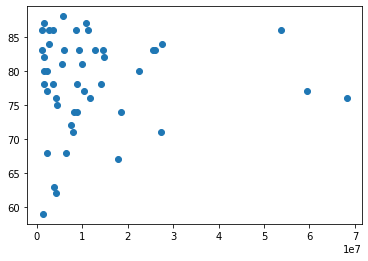

In [198]:
plt.scatter(x_axis_ten, y_axis_ten)

In [199]:
x_axis_eleven = merged_df["Expenditure"]
y_axis_eleven = merged_df["Graduation Rate"]

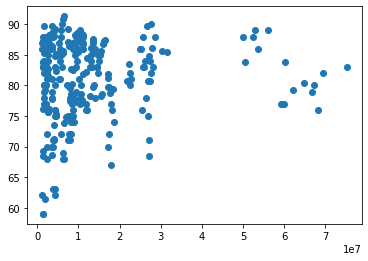

In [200]:
plt.scatter(x_axis_eleven, y_axis_eleven)

In [201]:
enroll = "enrollment_cleaned.csv"
enroll_df = pd.read_csv(enroll)
enroll_df.head()

,State,Fall 2010,Fall 2011,Fall 2012,Fall 2013,Fall 2014,Fall 2015
0,Alabama,"755,552","744,621","744,637","746,204","744,164","743,789"
1,Alaska,"132,104","131,167","131,489","130,944","131,176","132,477"
2,Arizona,"1,071,751","1,080,319","1,089,384","1,102,445","1,111,695","1,109,040"
3,Arkansas,"482,114","483,114","486,157","489,979","490,917","492,132"
4,California,"6,289,578","6,287,834","6,299,451","6,312,623","6,312,161","6,305,347"


In [202]:
enroll_df= enroll_df.rename(columns={"Fall 2010":"2010", "Fall 2011":"2011", "Fall 2012": "2012", "Fall 2013":"2013", "Fall 2014": "2014", "Fall 2015":"2015"})

In [203]:
enroll_df.head()

,State,2010,2011,2012,2013,2014,2015
0,Alabama,"755,552","744,621","744,637","746,204","744,164","743,789"
1,Alaska,"132,104","131,167","131,489","130,944","131,176","132,477"
2,Arizona,"1,071,751","1,080,319","1,089,384","1,102,445","1,111,695","1,109,040"
3,Arkansas,"482,114","483,114","486,157","489,979","490,917","492,132"
4,California,"6,289,578","6,287,834","6,299,451","6,312,623","6,312,161","6,305,347"


In [204]:
enroll2_df = pd.melt(enroll_df, id_vars = ['State'], value_name = 'Total Enrollment')

In [205]:
enroll2_df = enroll2_df.rename(columns={"variable":"Year"})
enroll2_df.head()

,State,Year,Total Enrollment
0,Alabama,2010,"755,552"
1,Alaska,2010,"132,104"
2,Arizona,2010,"1,071,751"
3,Arkansas,2010,"482,114"
4,California,2010,"6,289,578"


In [206]:
enroll2_df["Total Enrollment"] = enroll2_df["Total Enrollment"].str.replace(",","")

In [207]:
enroll2_df

,State,Year,Total Enrollment
0,Alabama,2010,755552
1,Alaska,2010,132104
2,Arizona,2010,1071751
3,Arkansas,2010,482114
4,California,2010,6289578
...,...,...,...
301,Virginia,2015,1283590
302,Washington,2015,1087030
303,West Virginia,2015,277452
304,Wisconsin,2015,867800


In [208]:
enroll2_df['Total Enrollment'] = enroll2_df['Total Enrollment'].astype(int)
enroll2_df['Year'] = enroll2_df['Year'].astype(int)

In [209]:
enroll2_df.head(5)

,State,Year,Total Enrollment
0,Alabama,2010,755552
1,Alaska,2010,132104
2,Arizona,2010,1071751
3,Arkansas,2010,482114
4,California,2010,6289578


In [210]:
enroll2_df[enroll2_df['State'] == 'Alabama']


,State,Year,Total Enrollment


In [211]:
enroll2_df["State"] = enroll2_df.State.str.strip()


In [212]:
merged_df[merged_df['State'] == 'Alabama']


,Year,State,Revenue,Expenditure,Graduation Rate
0,2010,Alabama,7279751.0,7638908.0,72.0
48,2011,Alabama,7375156.0,7402584.0,75.0
96,2012,Alabama,7135105.0,7212701.0,80.0
144,2013,Alabama,NaN,NaN,86.3
192,2014,Alabama,7355547.0,7578390.0,89.3
240,2015,Alabama,7358479.0,7492652.0,87.1


In [213]:
merged_df[merged_df['Year'] == 2010]

,Year,State,Revenue,Expenditure,Graduation Rate
0,2010,Alabama,7279751.0,7638908.0,72.0
1,2010,Alaska,2230140.0,2371251.0,68.0
2,2010,Arizona,8733504.0,8812967.0,78.0
3,2010,Arkansas,5049424.0,5481913.0,81.0
4,2010,California,64981631.0,68149357.0,76.0
5,2010,Colorado,8741450.0,8861592.0,74.0
6,2010,Connecticut,9544243.0,9313668.0,83.0
7,2010,Delaware,1695556.0,1695244.0,78.0
8,2010,District of Columbia,1195934.0,1290048.0,59.0
9,2010,Florida,26223878.0,27267009.0,71.0


In [214]:
merged2_df = pd.merge(merged_df, enroll2_df, on=['State', 'Year'], how="inner")

In [215]:
merged2_df.head(50)

,Year,State,Revenue,Expenditure,Graduation Rate,Total Enrollment
0,2010,Alabama,7279751.0,7638908.0,72.0,755552
1,2010,Alaska,2230140.0,2371251.0,68.0,132104
2,2010,Arizona,8733504.0,8812967.0,78.0,1071751
3,2010,Arkansas,5049424.0,5481913.0,81.0,482114
4,2010,California,64981631.0,68149357.0,76.0,6289578
5,2010,Colorado,8741450.0,8861592.0,74.0,843316
6,2010,Connecticut,9544243.0,9313668.0,83.0,560546
7,2010,Delaware,1695556.0,1695244.0,78.0,129403
8,2010,District of Columbia,1195934.0,1290048.0,59.0,71284
9,2010,Florida,26223878.0,27267009.0,71.0,2643347


In [216]:
file = 'Final Data Ratio.csv'
data = pd.read_csv(file)
data

,State/Jurisdiction,2000,2009,2010,2011,2012 Teachers,2012 Enrollment,2012 Pupil/\nteacher ratio,2013 Teachers,2013 Enrollment,2013 Pupil/\nteacher ratio,2014 Teachers,2014 Enrollment,2014 Pupil/\nteacher ratio
0,United States,16.0,15.4,16.0,16.0,"3,109,101","49,771,118",16.0,"3,113,764","50,044,522",16.1,"3,132,351","50,312,581",16.1
1,Alabama,15.4,15.8,15.3,15.6,"51,877","744,637",14.4,"47,162","746,204",15.8,"42,737","744,164",17.4
2,Alaska,16.9,16.3,16.2,16.2,"7,682","131,489",17.1,"7,898","130,944",16.6,"7,759","131,176",16.9
3,Arizona,19.8,20.7,21.4,21.3,"48,866","1,089,384",22.3,"48,359","1,102,445",22.8,"48,124","1,111,695",23.1
4,Arkansas,14.1,12.9,14.1,14.2,"34,131","486,157",14.2,"34,933","489,979",14.0,"35,430","490,917",13.9
5,California,20.6,19.8,24.1,23.4,"266,255","6,299,451",23.7,"259,506","6,312,623",24.3,"267,685","6,312,161",23.6
6,Colorado,17.3,17.0,17.4,17.8,"48,922","863,561",17.7,"50,157","876,999",17.5,"51,388","889,006",17.3
7,Connecticut,13.7,12.9,13.1,12.7,"43,931","550,954",12.5,"43,443","546,200",12.6,"42,062","542,678",12.9
8,Delaware,15.4,14.7,14.5,15.0,"9,257","129,026",13.9,"9,388","131,687",14.0,"9,649","134,042",13.9
9,District of Columbia,13.9,11.9,12.0,11.8,"5,925","76,140",12.9,"5,991","78,153",13.0,"6,565","80,958",12.3


In [217]:
data_ratio = data[["State/Jurisdiction", "2010", "2011", "2012 Pupil/\nteacher ratio", "2013 Pupil/\nteacher ratio", "2014 Pupil/\nteacher ratio"]]

In [218]:
data_ratio.head()

,State/Jurisdiction,2010,2011,2012 Pupil/\nteacher ratio,2013 Pupil/\nteacher ratio,2014 Pupil/\nteacher ratio
0,United States,16.0,16.0,16.0,16.1,16.1
1,Alabama,15.3,15.6,14.4,15.8,17.4
2,Alaska,16.2,16.2,17.1,16.6,16.9
3,Arizona,21.4,21.3,22.3,22.8,23.1
4,Arkansas,14.1,14.2,14.2,14.0,13.9


In [219]:
data_ratio= data_ratio.rename(columns={"State/Jurisdiction":"State", "2012 Pupil/\nteacher ratio":"2012", "2013 Pupil/\nteacher ratio":"2013", "2014 Pupil/\nteacher ratio": "2014"})
data_ratio.head()                                    
                                     
                                     

,State,2010,2011,2012,2013,2014
0,United States,16.0,16.0,16.0,16.1,16.1
1,Alabama,15.3,15.6,14.4,15.8,17.4
2,Alaska,16.2,16.2,17.1,16.6,16.9
3,Arizona,21.4,21.3,22.3,22.8,23.1
4,Arkansas,14.1,14.2,14.2,14.0,13.9


In [220]:
melted_ratio = pd.melt(data_ratio, id_vars = ['State'], value_name = 'Student/Teacher Ratio')

In [221]:
melted_ratio= melted_ratio.rename(columns={"variable":"Year"})
melted_ratio.dtypes

State                     object
Year                      object
Student/Teacher Ratio    float64
dtype: object

In [222]:
melted_ratio['Year'] = melted_ratio['Year'].astype(int)

In [223]:
final_df= pd.merge(merged2_df, melted_ratio, on=['State', 'Year'], how="inner")
final_df

,Year,State,Revenue,Expenditure,Graduation Rate,Total Enrollment,Student/Teacher Ratio
0,2010,Alabama,7279751.0,7638908.0,72.0,755552,15.3
1,2010,Alaska,2230140.0,2371251.0,68.0,132104,16.2
2,2010,Arizona,8733504.0,8812967.0,78.0,1071751,21.4
3,2010,Arkansas,5049424.0,5481913.0,81.0,482114,14.1
4,2010,California,64981631.0,68149357.0,76.0,6289578,24.1
...,...,...,...,...,...,...,...
235,2014,Virginia,15083311.0,15451418.0,85.7,1280381,14.2
236,2014,Washington,12943921.0,12765051.0,78.2,1073638,18.0
237,2014,West Virginia,3502513.0,3496901.0,86.5,280310,14.0
238,2014,Wisconsin,11001272.0,10920466.0,88.4,871432,14.9


In [225]:
final_df["Spending per Student"]= final_df["Expenditure"]/final_df["Total Enrollment"]*1000

In [226]:
final_df["Spending per Student"] = round(final_df["Spending per Student"], 2)

In [227]:
final_df

,Year,State,Revenue,Expenditure,Graduation Rate,Total Enrollment,Student/Teacher Ratio,Spending per Student
0,2010,Alabama,7279751.0,7638908.0,72.0,755552,15.3,10110.37
1,2010,Alaska,2230140.0,2371251.0,68.0,132104,16.2,17949.88
2,2010,Arizona,8733504.0,8812967.0,78.0,1071751,21.4,8222.96
3,2010,Arkansas,5049424.0,5481913.0,81.0,482114,14.1,11370.57
4,2010,California,64981631.0,68149357.0,76.0,6289578,24.1,10835.28
...,...,...,...,...,...,...,...,...
235,2014,Virginia,15083311.0,15451418.0,85.7,1280381,14.2,12067.83
236,2014,Washington,12943921.0,12765051.0,78.2,1073638,18.0,11889.53
237,2014,West Virginia,3502513.0,3496901.0,86.5,280310,14.0,12475.12
238,2014,Wisconsin,11001272.0,10920466.0,88.4,871432,14.9,12531.63


In [228]:
final_df = final_df.rename(columns={"Expenditure":"Expenditure (in thousands)", "Revenue":"Revenue(in thousands)"})

In [229]:
final_df

,Year,State,Revenue(in thousands),Expenditure (in thousands),Graduation Rate,Total Enrollment,Student/Teacher Ratio,Spending per Student
0,2010,Alabama,7279751.0,7638908.0,72.0,755552,15.3,10110.37
1,2010,Alaska,2230140.0,2371251.0,68.0,132104,16.2,17949.88
2,2010,Arizona,8733504.0,8812967.0,78.0,1071751,21.4,8222.96
3,2010,Arkansas,5049424.0,5481913.0,81.0,482114,14.1,11370.57
4,2010,California,64981631.0,68149357.0,76.0,6289578,24.1,10835.28
...,...,...,...,...,...,...,...,...
235,2014,Virginia,15083311.0,15451418.0,85.7,1280381,14.2,12067.83
236,2014,Washington,12943921.0,12765051.0,78.2,1073638,18.0,11889.53
237,2014,West Virginia,3502513.0,3496901.0,86.5,280310,14.0,12475.12
238,2014,Wisconsin,11001272.0,10920466.0,88.4,871432,14.9,12531.63


In [234]:
x_axis = final_df["Student/Teacher Ratio"]
y_axis = final_df ["Graduation Rate"]

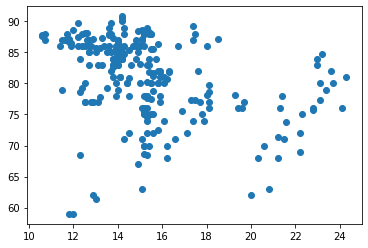

In [235]:
plt.scatter(x_axis, y_axis)